In [1]:
!pip install catboost
import warnings
import requests
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

#machine learning Algorithms For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

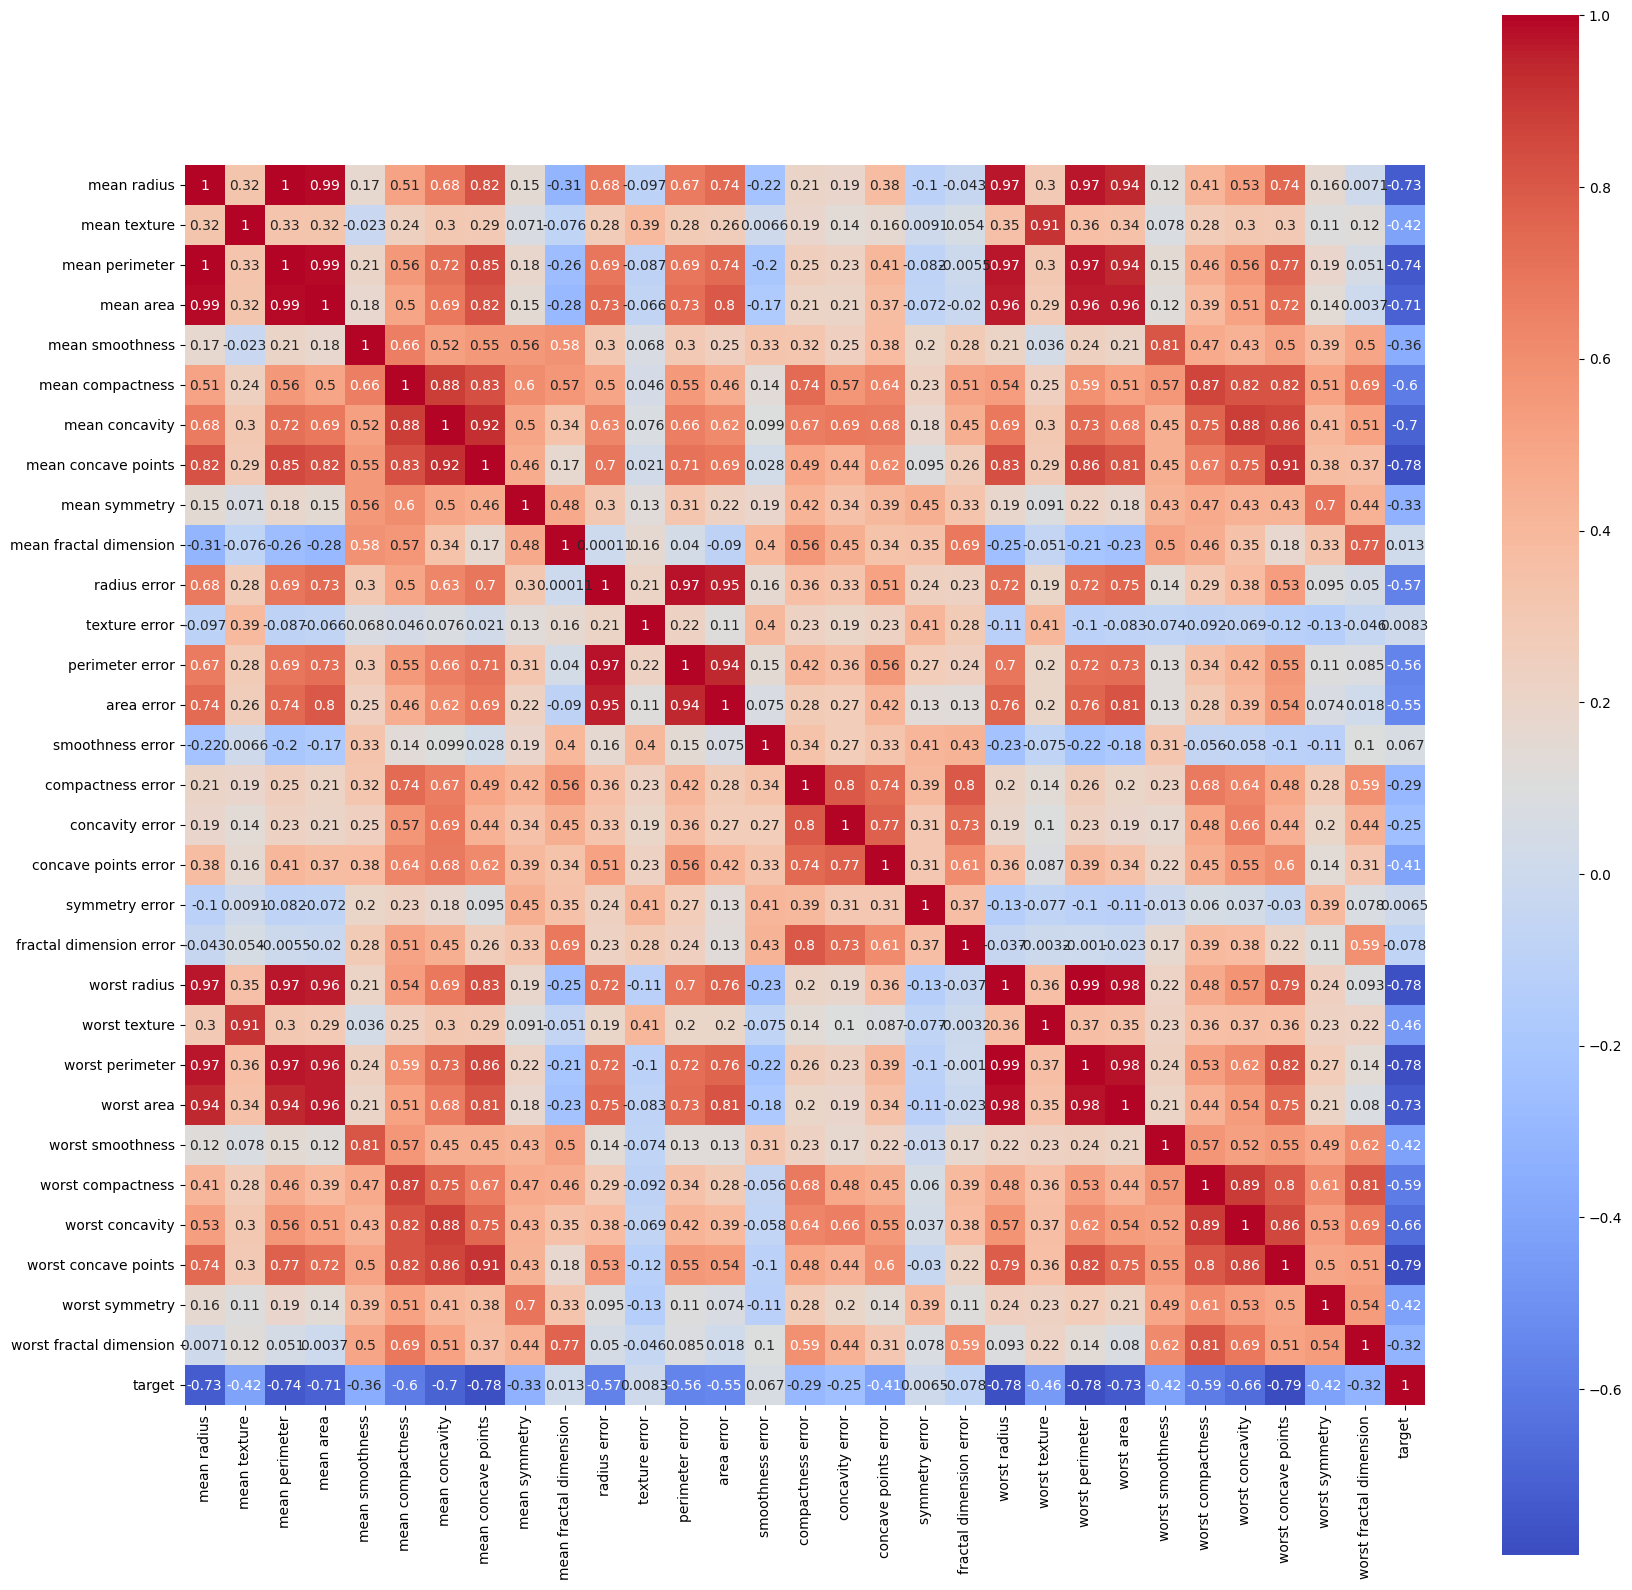

In [4]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [5]:
X = df.drop('target', axis=1)
y = df['target']

## **Standardize the Data**

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Save the trained model
joblib.dump(X_scaled, 'X_scaled.pkl')
# Count all elements in the array
total_elements = np.size(X_scaled)
print(total_elements)


17070


## **Apply PCA**

In [7]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
joblib.dump(pca,'pca.pkl')

['pca.pkl']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.20,random_state=42)

In [9]:
# Dictionary of classification algorithms
algorithms = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),  # Suppress LightGBM logs
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000)
}


Training Logistic Regression...
Saved Logistic Regression model to saved_models/Logistic Regression.joblib
Logistic Regression Metrics:
Accuracy: 0.9737
Precision: 0.9737
Recall: 0.9737
F1 Score: 0.9736
----------------------------------------
Training Decision Tree...
Saved Decision Tree model to saved_models/Decision Tree.joblib
Decision Tree Metrics:
Accuracy: 0.9825
Precision: 0.9825
Recall: 0.9825
F1 Score: 0.9825
----------------------------------------
Training Random Forest...
Saved Random Forest model to saved_models/Random Forest.joblib
Random Forest Metrics:
Accuracy: 0.9386
Precision: 0.9390
Recall: 0.9386
F1 Score: 0.9387
----------------------------------------
Training SVC...
Saved SVC model to saved_models/SVC.joblib
SVC Metrics:
Accuracy: 0.9737
Precision: 0.9737
Recall: 0.9737
F1 Score: 0.9736
----------------------------------------
Training KNN...
Saved KNN model to saved_models/KNN.joblib
KNN Metrics:
Accuracy: 0.9474
Precision: 0.9474
Recall: 0.9474
F1 Score: 0.94

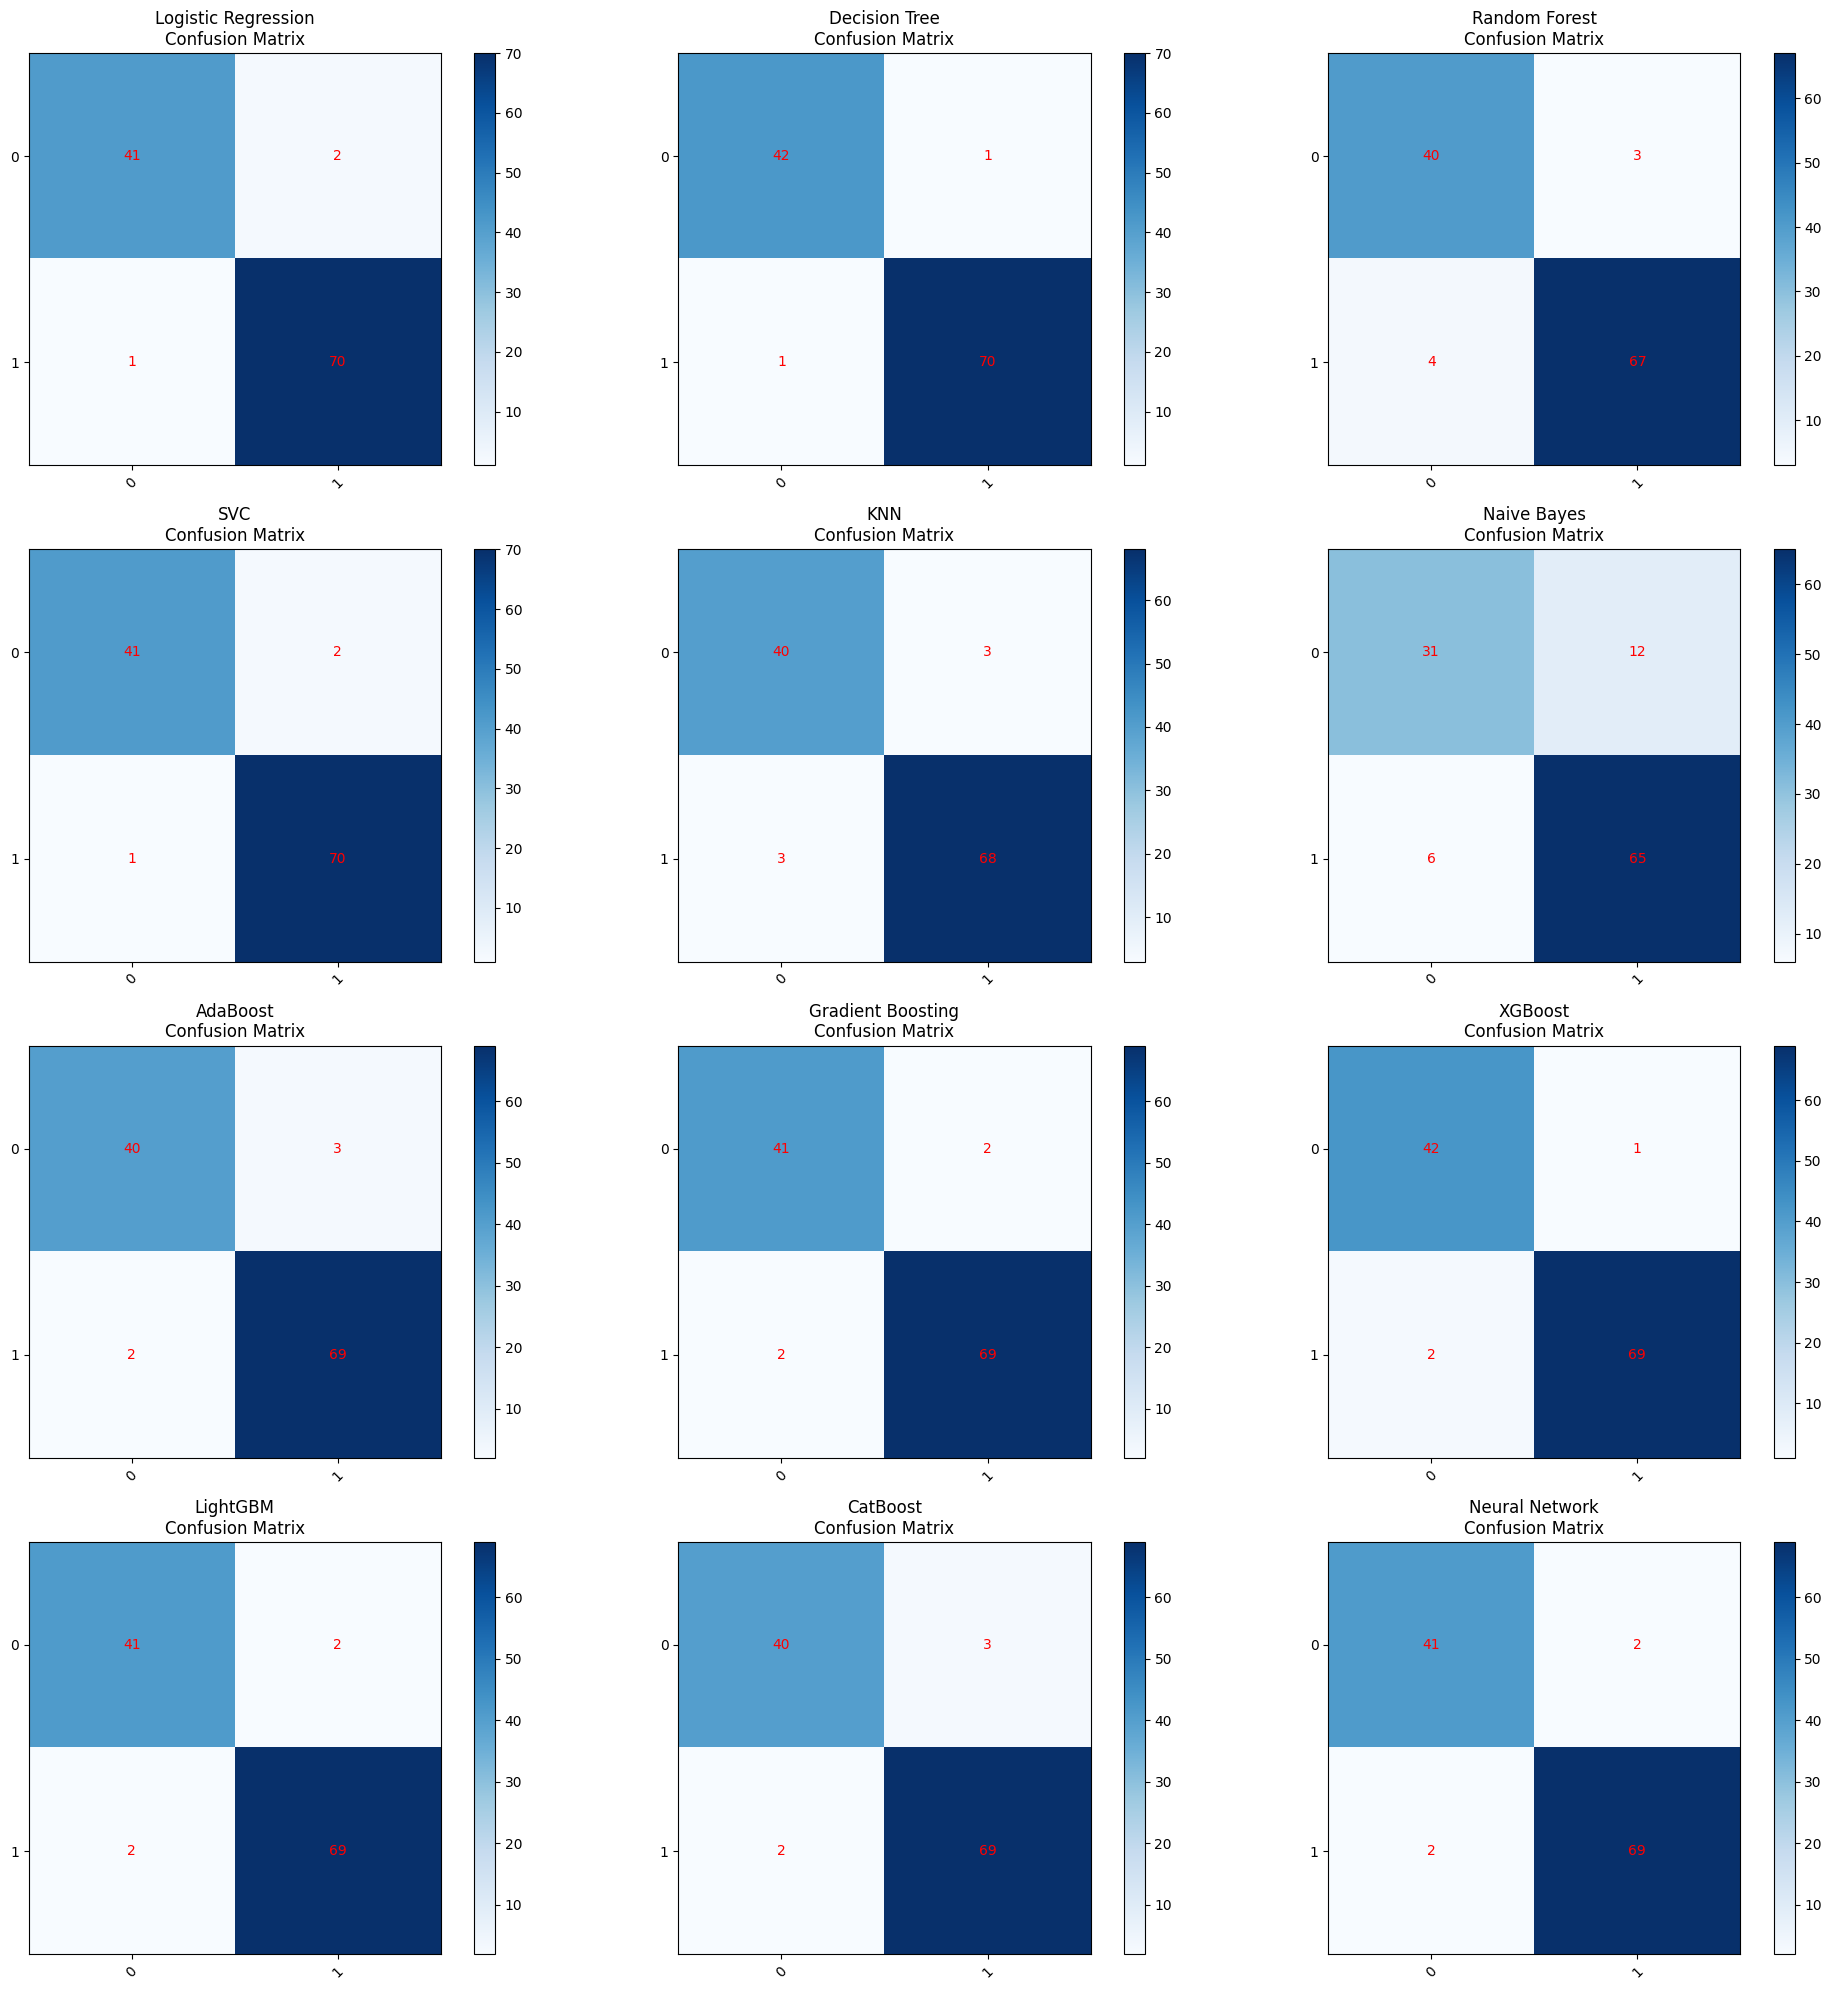

In [11]:
# Initialize a figure for confusion matrices
plt.figure(figsize=(20, 20))
models_dir = "saved_models"
os.makedirs(models_dir, exist_ok=True)

# Train and evaluate each algorithm
for i, (name, model) in enumerate(algorithms.items()):
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    model_filename = os.path.join(models_dir, f"{name}.joblib")
    joblib.dump(model, model_filename)
    print(f"Saved {name} model to {model_filename}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

    # Plot confusion matrix in a subplot
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(4, 3, i+1)  # 4 rows, 3 columns for 12 algorithms
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name}\nConfusion Matrix")
    plt.colorbar()

    # Get the number of unique classes in the target variable
    num_classes = len(np.unique(y_test))

    tick_marks = np.arange(num_classes)  # Use num_classes instead of hardcoding 7
    plt.xticks(tick_marks, np.unique(y_test), rotation=45) # Use unique class labels
    plt.yticks(tick_marks, np.unique(y_test))  # Use unique class labels

    # Labeling the matrix - adjust loop ranges
    for j in range(cm.shape[0]): # Iterate over actual classes (rows)
        for k in range(cm.shape[1]): # Iterate over predicted classes (columns)
            plt.text(k, j, format(cm[j, k], 'd'), ha="center", va="center", color="red")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

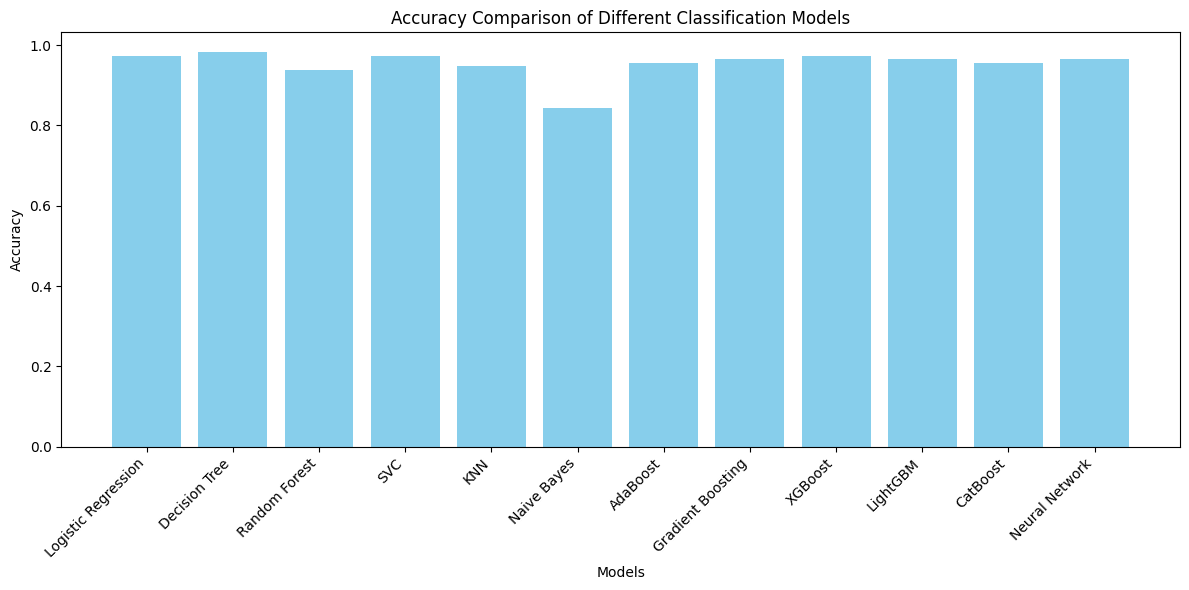

In [12]:
model_names = list(algorithms.keys())
accuracies = [] # List to store accuracies of each model
for i, (name, model) in enumerate(algorithms.items()):
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test,y_pred))

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Classification Models")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [14]:


# Load the saved models
models_dir = "saved_models"
loaded_models = {}
for filename in os.listdir(models_dir):
    if filename.endswith(".joblib"):
        model_name = filename[:-7]  # Remove ".joblib" extension
        model_path = os.path.join(models_dir, filename)
        loaded_models[model_name] = joblib.load(model_path)

# Load preprocessing objects
#scaler = joblib.load('X_scaled.pkl')
scaler = StandardScaler()  # Create a new StandardScaler
scaler.fit(X) # Fit the scaler on the original data

pca = joblib.load('pca.pkl')

# Example of a new record (replace with your actual data)
new_record = pd.DataFrame({
    'mean radius': [17.99],
    'mean texture': [10.38],
    'mean perimeter': [122.8],
    'mean area': [1001],
    'mean smoothness': [0.1184],
    'mean compactness': [0.2776],
    'mean concavity': [0.3001],
    'mean concave points': [0.1471],
    'mean symmetry': [0.2419],
    'mean fractal dimension': [0.07871],
    'radius error': [1.095],
    'texture error': [0.9053],
    'perimeter error': [8.589],
    'area error': [153.4],
    'smoothness error': [0.006399],
    'compactness error': [0.04904],
    'concavity error': [0.05373],
    'concave points error': [0.01587],
    'symmetry error': [0.03003],
    'fractal dimension error': [0.006193],
    'worst radius': [25.38],
    'worst texture': [17.33],
    'worst perimeter': [184.6],
    'worst area': [2019],
    'worst smoothness': [0.1622],
    'worst compactness': [0.6656],
    'worst concavity': [0.7119],
    'worst concave points': [0.2654],
    'worst symmetry': [0.4601],
    'worst fractal dimension': [0.1189]
})

new_record_scaled = scaler.transform(new_record)
new_record_pca = pca.transform(new_record_scaled)


# Make predictions with all loaded models
for model_name, model in loaded_models.items():
    prediction = model.predict(new_record_pca)
    print(f"Prediction from {model_name}: {prediction}")

Prediction from Decision Tree: [0]
Prediction from SVC: [0]
Prediction from CatBoost: [0]
Prediction from Gradient Boosting: [0]
Prediction from Random Forest: [0]
Prediction from AdaBoost: [0]
Prediction from Logistic Regression: [0]
Prediction from LightGBM: [0]
Prediction from KNN: [0]
Prediction from Neural Network: [0]
Prediction from XGBoost: [0]
Prediction from Naive Bayes: [0]
